**Implementing Kernel SVM with Scikit-Learn**

In [60]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [61]:
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"

In [62]:
colnames = ['sepal-length', 'sepal-width', 'petal-length', 'petal-width', 'Class']

In [63]:
irisdata = pd.read_csv(url, names=colnames)
irisdata

,sepal-length,sepal-width,petal-length,petal-width,Class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


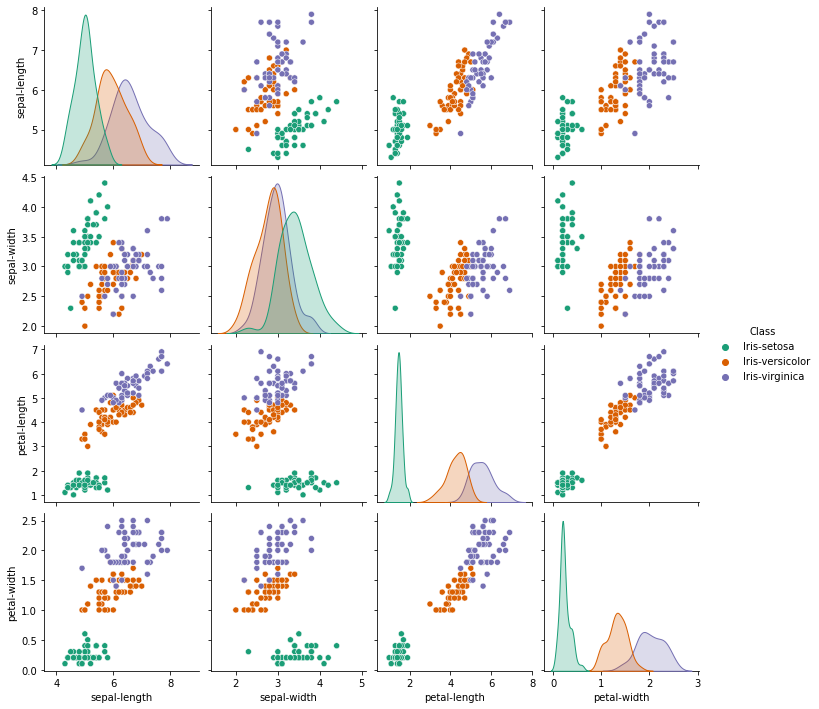

In [64]:
import seaborn as sns
sns.pairplot(irisdata,hue="Class",palette="Dark2")

In [65]:
X = irisdata.drop('Class', axis=1)
y = irisdata['Class']

In [66]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20)

In [67]:
from sklearn.svm import SVC
svclassifier = SVC(kernel='poly', degree=8)
svclassifier.fit(X_train, y_train)

SVC(degree=8, kernel='poly')

In [68]:
y_pred = svclassifier.predict(X_test)

In [69]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[12  0  0]
 [ 0  9  1]
 [ 0  0  8]]
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        12
Iris-versicolor       1.00      0.90      0.95        10
 Iris-virginica       0.89      1.00      0.94         8

       accuracy                           0.97        30
      macro avg       0.96      0.97      0.96        30
   weighted avg       0.97      0.97      0.97        30



In [70]:
from sklearn.svm import SVC
svclassifier = SVC(kernel='rbf')
svclassifier.fit(X_train, y_train)

SVC()

In [71]:
y_pred = svclassifier.predict(X_test)
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[12  0  0]
 [ 0  9  1]
 [ 0  0  8]]
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        12
Iris-versicolor       1.00      0.90      0.95        10
 Iris-virginica       0.89      1.00      0.94         8

       accuracy                           0.97        30
      macro avg       0.96      0.97      0.96        30
   weighted avg       0.97      0.97      0.97        30



In [72]:
from sklearn.svm import SVC
svclassifier = SVC(kernel='sigmoid')
svclassifier.fit(X_train, y_train)

SVC(kernel='sigmoid')

In [73]:
y_pred = svclassifier.predict(X_test)
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[ 0  0 12]
 [ 0  0 10]
 [ 0  0  8]]
                 precision    recall  f1-score   support

    Iris-setosa       0.00      0.00      0.00        12
Iris-versicolor       0.00      0.00      0.00        10
 Iris-virginica       0.27      1.00      0.42         8

       accuracy                           0.27        30
      macro avg       0.09      0.33      0.14        30
   weighted avg       0.07      0.27      0.11        30



/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [74]:
from sklearn.model_selection import GridSearchCV

In [75]:
param_grid = {'C':[0.1,1,10,100], 'gamma':[1,0.1,0.01,0.001],"degree": np.arange(1, 25)}

In [76]:
grid = GridSearchCV(SVC(), param_grid, refit = True, verbose=3)
grid.fit(X_train, y_train)

Fitting 5 folds for each of 384 candidates, totalling 1920 fits
[CV 1/5] END ..........C=0.1, degree=1, gamma=1;, score=1.000 total time=   0.0s
[CV 2/5] END ..........C=0.1, degree=1, gamma=1;, score=0.958 total time=   0.0s
[CV 3/5] END ..........C=0.1, degree=1, gamma=1;, score=0.917 total time=   0.0s
[CV 4/5] END ..........C=0.1, degree=1, gamma=1;, score=0.958 total time=   0.0s
[CV 5/5] END ..........C=0.1, degree=1, gamma=1;, score=0.958 total time=   0.0s
[CV 1/5] END ........C=0.1, degree=1, gamma=0.1;, score=0.958 total time=   0.0s
[CV 2/5] END ........C=0.1, degree=1, gamma=0.1;, score=0.917 total time=   0.0s
[CV 3/5] END ........C=0.1, degree=1, gamma=0.1;, score=0.917 total time=   0.0s
[CV 4/5] END ........C=0.1, degree=1, gamma=0.1;, score=0.958 total time=   0.0s
[CV 5/5] END ........C=0.1, degree=1, gamma=0.1;, score=0.958 total time=   0.0s
[CV 1/5] END .......C=0.1, degree=1, gamma=0.01;, score=0.667 total time=   0.0s
[CV 2/5] END .......C=0.1, degree=1, gamma=0.

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100],
                         'degree': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24]),
                         'gamma': [1, 0.1, 0.01, 0.001]},
             verbose=3)

In [77]:
grid.best_params_

{'C': 100, 'degree': 1, 'gamma': 0.01}

In [78]:
grid.best_score_

0.9833333333333334

In [79]:
pred_grid = grid.predict(X_test)

In [80]:
print(confusion_matrix(y_test, pred_grid))

[[12  0  0]
 [ 0  9  1]
 [ 0  0  8]]


In [81]:
print(classification_report(y_test, pred_grid))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        12
Iris-versicolor       1.00      0.90      0.95        10
 Iris-virginica       0.89      1.00      0.94         8

       accuracy                           0.97        30
      macro avg       0.96      0.97      0.96        30
   weighted avg       0.97      0.97      0.97        30



In [82]:
kernels = ["Polynomial","RBF","Sigmoid","Linear"]
def getClassifier(ktype):
  if ktype == 0:
    return SVC(kernel="poly", degree=8, gamma="auto")
  elif ktype == 1:
    return SVC(kernel="rbf", gamma="auto")
  elif ktype == 2:
    return SVC(kernel="sigmoid", gamma="auto")
  elif ktype == 3:
    return SVC(kernel="linear", gamma="auto")

In [83]:
for i in range(4):
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20)
  svclassifier = getClassifier(i)
  svclassifier.fit(X_train,y_train)
  y_pred = svclassifier.predict(X_test)
  print("Evaluation:",kernels[i],"kernels")
  print(classification_report(y_test,y_pred))


Evaluation: Polynomial kernels
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       1.00      0.89      0.94         9
 Iris-virginica       0.92      1.00      0.96        11

       accuracy                           0.97        30
      macro avg       0.97      0.96      0.97        30
   weighted avg       0.97      0.97      0.97        30

Evaluation: RBF kernels
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00         8
Iris-versicolor       1.00      1.00      1.00         9
 Iris-virginica       1.00      1.00      1.00        13

       accuracy                           1.00        30
      macro avg       1.00      1.00      1.00        30
   weighted avg       1.00      1.00      1.00        30

Evaluation: Sigmoid kernels
                 precision    recall  f1-score   support

    Iris-setosa       0.00      0.00      0.00        1

/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


**SVR in 6 Steps with Python:**

In [84]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [85]:
dataset = pd.read_csv('/Position_Salaries.csv')
X = dataset.iloc[:,1:2].values.astype(float)
y = dataset.iloc[:,2:3].values.astype(float)

In [86]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
sc_y = StandardScaler()
X = sc_X.fit_transform(X)
y = sc_y.fit_transform(y)

In [87]:
# Create your support vector regressor here
from sklearn.svm import SVR
# most important SVR parameter is Kernel type. It can be linear,polynomial or gaussian.
#SVR. We have a non-linear condition so we can select polynomial or gaussian but here
#we select RBF(a gaussian type) kernel. 
regressor = SVR(kernel='rbf')
regressor.fit(X,y)


/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR()

In [88]:
y_pred_sc = regressor.predict(sc_X.transform([[6.5]]))
y_pred = sc_y.inverse_transform([y_pred_sc,])
y_pred

array([[170370.0204065]])

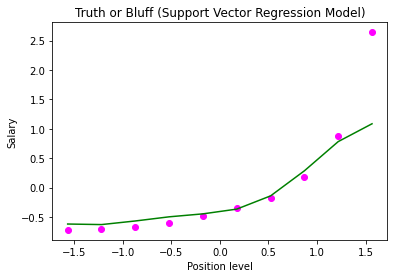

In [89]:
plt.scatter(X, y, color = 'magenta')
plt.plot(X, regressor.predict(X), color = 'green')
plt.title('Truth or Bluff (Support Vector Regression Model)')
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.show()


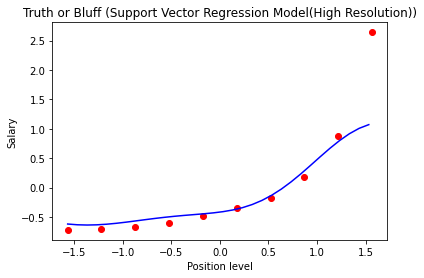

In [90]:
X_grid = np.arange(min(X), max(X), 0.1)
X_grid = X_grid.reshape((len(X_grid), 1))
plt.scatter(X, y, color = 'red')
plt.plot(X_grid, regressor.predict(X_grid), color = 'blue')
plt.title('Truth or Bluff (Support Vector Regression Model(High Resolution))')
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.show()
